In [1]:
#To be run from workenvunet

#Combining data from both batches

#Data from only one batch

#Reading full kidney and cysts masks, they can be binary or with 0 and 1

CTDataPath1 = 'E:/AAV para enfermedades renales/CT/Tanda 5 (2021-2022)'
CTDataPath2 = 'E:/AAV para enfermedades renales/CT/Tanda 7 (2022-2023)'        


#There are 4 timesteps. Batch 1 has images in steps 1, 2, 3 and 4. Batch 2 has images in steps 1, 2 and 3

#Number of control and pathological mice in the first batch'
numControlBatch1=1
numPathBatch1=5
#MRIDataPath = 'D:\AAV para enfermedades renales\Imágenes de CT y MR\MRI\Tanda 5 (2021-2022)'    

import tifffile as tiff
from glob import glob as glob
import os
import nrrd
import matplotlib.pyplot as plt
import numpy as np
import re
from scipy import ndimage

daysCT = glob(CTDataPath1+'/*')

#Extract the number of folders inside the first day being analyzed (first folder alphabetically)
#ordered inside CTDataPath
numMice = len(glob(glob(CTDataPath1+'/*')[0]+'/*'))+len(glob(glob(CTDataPath2+'/*')[0]+'/*'))


controlFullKidneys = np.zeros([len(daysCT),numMice],dtype = int)
fullKidneys = np.zeros([len(daysCT),numMice],dtype = int)

controlCysts = np.zeros([len(daysCT),numMice],dtype = int)
cysts = np.zeros([len(daysCT),numMice],dtype = int)
#This variable will be used to store the number of control mice in the study

for batchPath in [CTDataPath1,CTDataPath2]:
    
    for dayCount,day in enumerate(daysCT):
            
        #If that day is present in the batch
        if len(glob(batchPath+'/*'))>=(dayCount+1):
            dayMice = glob(glob(batchPath+'/*')[dayCount]+'/*')
               
            for mouseCount,mouse in enumerate(dayMice):

                #print('\n')
                print(os.path.basename(mouse))
                
                #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                fullKidneysMaskName = glob(mouse+'/*Corrected*fullKidneysMask*')
                    
                fullKidneysMask = tiff.imread(fullKidneysMaskName[0])
                #Create distance map
                distTransf = ndimage.morphology.distance_transform_edt(1*(fullKidneysMask>0))

                #Calculate total kidneys volume
                totVol=np.sum(1*(fullKidneysMask>0))
                #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                cystsMaskName = glob(mouse+'/*Corrected*cystsMask*')
               
                if cystsMaskName != []:
                    cystsMask = tiff.imread(cystsMaskName[0])
                    totDisVol=np.sum(1*(cystsMask>0))
                    #Mean distance transform values within the cysts 
                    distWeightedtotDisVol = np.sum(distTransf[cystsMask>0])/np.count_nonzero(distTransf[cystsMask>0])
                    #print(distWeightedtotDisVol)
                #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
               
                #num will be defined now to set a position to store data inside the matrix
                mouseData = re.split('RATON',os.path.basename(fullKidneysMaskName[0]),flags=re.IGNORECASE)

                #If we are in the first batch
                if batchPath == CTDataPath1 and mouseData[1][0]!='_':

                    ide = mouseData[1][0]  
                    num=int(ide)

                    print('num: ',num)
                   
                    #If we are at the control
                    if num == 1:
                       controlFullKidneys[dayCount,0] = totVol
                       controlCysts[dayCount,0] = totDisVol

                    else:
                       fullKidneys[dayCount,num-2] = totVol
                       cysts[dayCount,num-2] = totDisVol


                    
                #Else, if you are in the second batch, with different structures for the names                           
                elif batchPath == CTDataPath2 and (not mouseData[1][0]!='_'):
                    #Else, pick the identifier (like C1), and then the number inside it
                    ide=mouseData[1].split('_')[1]
                    num = int(ide[1])
                    #If it is C1 or C2
                    if ide=='C2':
                       controlFullKidneys[dayCount,numControlBatch1] = totVol
                       controlCysts[dayCount,numControlBatch1] = totDisVol
                    
                    #C1 is not really a control
                    elif ide =='C1':
                       fullKidneys[dayCount,numPathBatch1+5] = totVol
                       cysts[dayCount,numPathBatch1+5] = totDisVol   
                    else:
                       fullKidneys[dayCount,numPathBatch1+num-1] = totVol
                       cysts[dayCount,numPathBatch1+num-1] = totDisVol                        

                print(num)


              
            #print('fullKidneys ')
            #print(fullKidneys)
            
            #print('controlFullKidneys ')
            #print(controlFullKidneys)
            
            #print('cysts[:,:] ')
            #print(cysts[:,:])
        
            #print('controlCysts[:,:] ')
            #print(controlCysts[:,:])
            
#Remove all-zero columns
fullKidneys = fullKidneys[:,~np.all(fullKidneys == 0, axis = 0)]

controlFullKidneys = controlFullKidneys[:,~np.all(controlFullKidneys == 0, axis = 0)]

cysts = cysts[:,~np.all(cysts == 0, axis = 0)] 

controlCysts = controlCysts[:,~np.all(controlCysts == 0, axis = 0)]

print('fullKidneys')
print(fullKidneys)

print('controlFullKidneys')
print(controlFullKidneys)

print('cysts')
print(cysts)
        
print('controlCysts')
print(controlCysts)

TROPISMORENAL_RATON1_2I1D_26NOV21_26Nov2021_Acq001_ring


C:\Users\equipo\AppData\Local\Temp\ipykernel_1744\1474101032.py:61: DeprecationWarning: Please use `distance_transform_edt` from the `scipy.ndimage` namespace, the `scipy.ndimage.morphology` namespace is deprecated.
  distTransf = ndimage.morphology.distance_transform_edt(1*(fullKidneysMask>0))


num:  1
1
TROPISMORENAL_RATON2_1D_26NOV21_26Nov2021_Acq001_ring
num:  2
2
TROPISMORENAL_RATON3_1I_26NOV21_26Nov2021_Acq001_ring
num:  3
3
TROPISMORENAL_RATON4_2D_26NOV21_26Nov2021_Acq001_ring
num:  4
4
TROPISMORENAL_RATON5_2I_26NOV21_26Nov2021_Acq001_ring
num:  5
5
TROPISMORENAL_RATON6_1D1I_26NOV21_26Nov2021_Acq001_ring
num:  6
6
TROPISMORENAL_RATON1_2D1I_10DIC21_10Dec2021_Acq001_ring
num:  1
1
TROPISMORENAL_RATON2_1D_10DIC21_10Dec2021_Acq001_ring
num:  2
2
TROPISMORENAL_RATON3_1I_10DIC21_10Dec2021_Acq001_ring
num:  3
3
TROPISMORENAL_RATON4_2D_10DIC21_10Dec2021_Acq001_ring
num:  4
4
TROPISMORENAL_RATON5_2I_10DIC21_10Dec2021_Acq001_ring
num:  5
5
TROPISMORENAL_RATON6_1D1I_10DIC21_10Dec2021_Acq001_ring
num:  6
6
TROPISMORENAL_RATON1_2D1I_23DIC21_23Dec2021_Acq001_ring
num:  1
1
TROPISMORENAL_RATON2_1D_23DIC21_23Dec2021_Acq001_ring
num:  2
2
TROPISMORENAL_RATON4_2D_23DIC21_23Dec2021_Acq001_ring
num:  4
4
TROPISMORENAL_RATON5_2I_23DIC21_23Dec2021_Acq001_ring
num:  5
5
TROPISMORENAL_RATON6_1

anovaResFullKidneys:  F_onewayResult(statistic=12.61957846381048, pvalue=1.8662639123712662e-05)
anovaResFullKidneys pathological vs control (4 weeks):  F_onewayResult(statistic=302.5861652838368, pvalue=2.374817347753996e-09)
anovaResFullKidneys 4 weeks vs 6 weeks:  F_onewayResult(statistic=9.978025015324251, pvalue=0.004938914048487339)
anovaResFullKidneys pathological vs control (6 weeks):  F_onewayResult(statistic=484.5857212346968, pvalue=1.905512557180467e-10)
anovaResFullKidneys 6 weeks vs 8 weeks:  F_onewayResult(statistic=9.240208555251154, pvalue=0.0078038264017856514)
anovaResFullKidneys pathological vs control (8 weeks):  F_onewayResult(statistic=190.7670930343632, pvalue=2.462094066019169e-06)
anovaResFullKidneys 8 weeks vs 10 weeks:  F_onewayResult(statistic=0.37944665561777574, pvalue=0.5531574802111737)
anovaResFullKidneys pathological vs control (10 weeks):  F_onewayResult(statistic=1806299.7730146246, pvalue=9.084167624895651e-10)



anovaResCysts:  F_onewayResult(sta

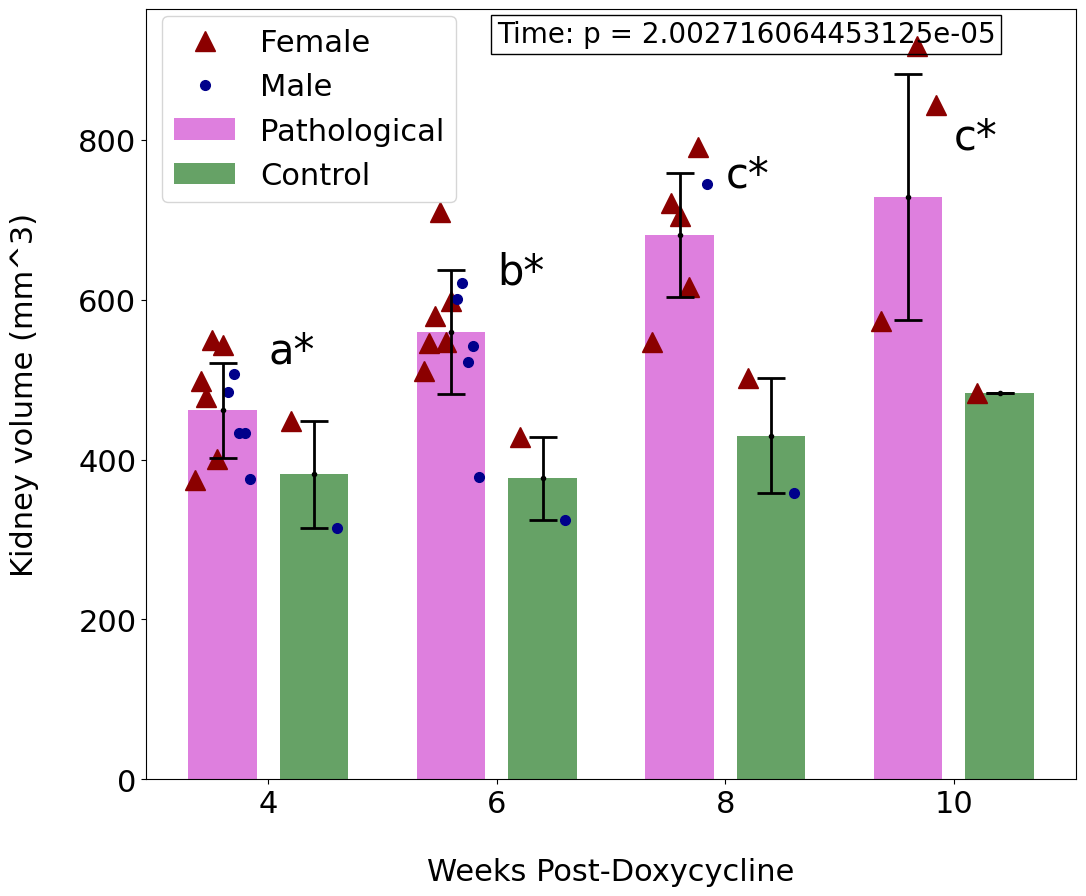

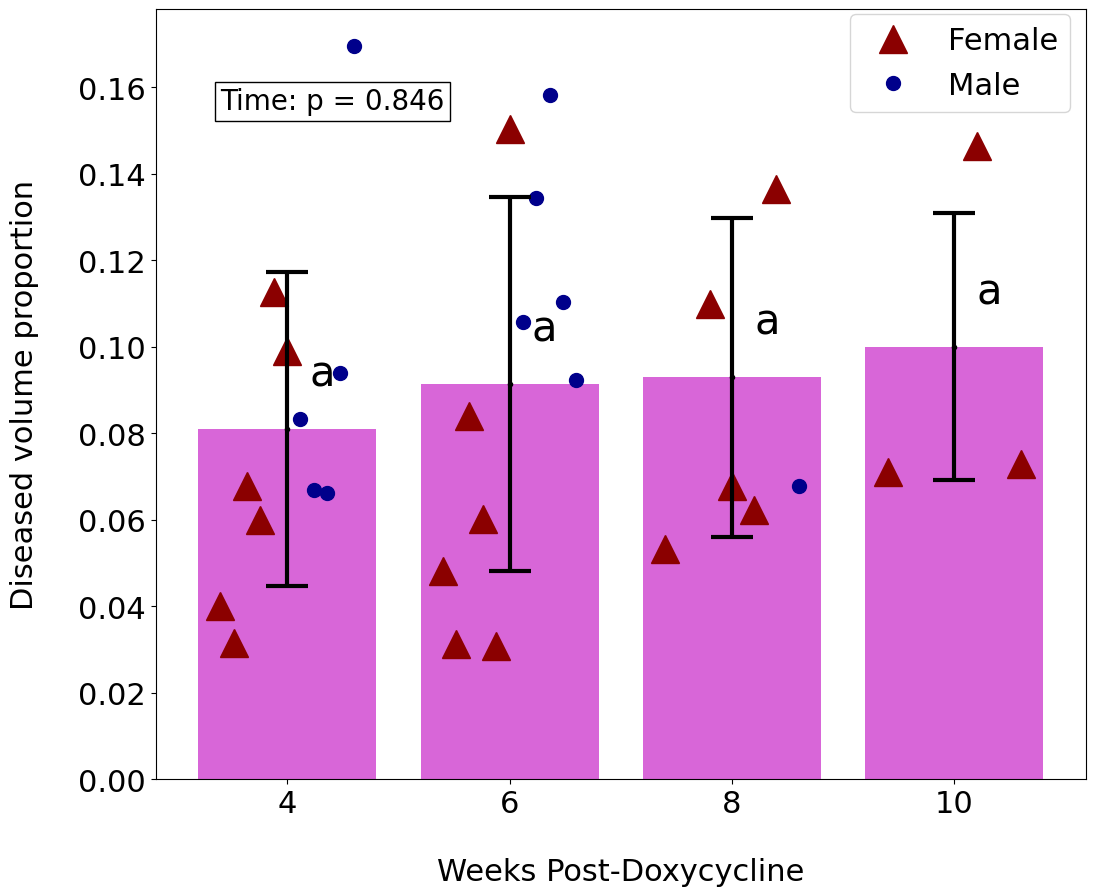

In [57]:
#Plotting CT data from both batches (requires the previous cell to have been run)


#Folder to save the figures
figuresFolder = 'E:/AAV para enfermedades renales/Publications/CT+MRI+Histology/Images/NewGraphs/CT'

saving = True

from scipy.optimize import curve_fit
from scipy.stats import f_oneway
import pandas as pd
import seaborn as sns
import pingouin as pg
import matplotlib.pyplot as plt
import matplotlib as mpl
#################################################################################


#Transparency of the bars
alphaValue = 0.6

#Markers for the control mice
markers = ['^','s']

#Voxel size = (0.122 mm)^3 = 0.0018 mm^3
voxSize = 0.0018

#Change the color of all fonts in the plots
fontColor = 'black'
mpl.rcParams['text.color'] = fontColor
mpl.rcParams['axes.labelcolor'] = fontColor
mpl.rcParams['xtick.color'] = fontColor
mpl.rcParams['ytick.color'] = fontColor

#Change font size
font = {'family': 'sans-serif',
        'weight' : 'light',
        'size'   : 22}



plt.rc('font', **font)
plt.figure(figsize=(12,10))
#Parameter to control how separated are pathological from control bars
sideOffset = 0.2
#Parameter to control the width of each individual bar
barWidth1 = 0.3

fullKidneyMeans = np.zeros(fullKidneys.shape[0])
fullKidneyStd = np.zeros(fullKidneys.shape[0])
for i in range(len(fullKidneyMeans)):
    fullKidneyMeans[i] = np.mean(voxSize*fullKidneys[i,fullKidneys[i,:]!=0])
    fullKidneyStd[i] = np.std(voxSize*fullKidneys[i,fullKidneys[i,:]!=0])
    #Plot points around i
    numPoints = np.sum(fullKidneys[i,:]!=0)
    pointPosit = (i-sideOffset) + np.linspace(-0.12,0.12,numPoints)
    #plt.plot(pointPosit,voxSize*fullKidneys[i,fullKidneys[i,:]!=0],'.',ms = 14,color = 'darkred')

    #Plot the points separated by female (first batch) and male (second batch)
    for j in range(numPoints):
        
        #If it is one of the females
        if voxSize*fullKidneys[i,j]!=0 and j<=5:
            if j == 0 and i == 0:
                labelName = 'Female'
            else:
                labelName = ''
        
            plt.plot(pointPosit[j],voxSize*fullKidneys[i,j],'^',ms = 14,color = 'darkred',label = labelName)
        elif voxSize*fullKidneys[i,j]!=0 and j>5:
            if j == 6 and i == 0:
                labelName = 'Male'
            else:
                labelName = ''

            plt.plot(pointPosit[j],voxSize*fullKidneys[i,j],'.',ms = 14,color = 'darkblue',label = labelName) 
    
fullKidneys_dict = {'4 weeks':voxSize*fullKidneys[0,fullKidneys[0,:]!=0],\
                    '6 weeks':voxSize*fullKidneys[1,fullKidneys[1,:]!=0],\
                    '8 weeks':voxSize*fullKidneys[2,fullKidneys[2,:]!=0],\
                    '10 weeks':voxSize*fullKidneys[3,fullKidneys[3,:]!=0]}


#plt.boxplot(fullKidneys_dict.values(),positions=range(0,len(fullKidneys_dict)))




controlFullKidneyMeans = np.zeros(controlFullKidneys.shape[0])
controlFullKidneyStd = np.zeros(controlFullKidneys.shape[0])

for i in range(len(controlFullKidneyMeans)):
    controlFullKidneyMeans[i] = np.mean(voxSize*controlFullKidneys[i,controlFullKidneys[i,:]!=0])
    controlFullKidneyStd[i] = np.std(voxSize*controlFullKidneys[i,controlFullKidneys[i,:]!=0])
    
    #Plot points around i
    numPoints = np.sum(controlFullKidneys[i,:]!=0)
    pointPosit = (i+sideOffset) + np.linspace(-0.10,0.10,numPoints)
    #plt.plot(pointPosit,voxSize*controlFullKidneys[i,controlFullKidneys[i,:]!=0],'.',ms = 14,color = 'darkgreen')

    #Plot the points separated by female (first batch) and male (second batch)
    for j in range(numPoints):
        
        #If it is one of the females
        if voxSize*controlFullKidneys[i,j]!=0 and j<=0:

            plt.plot(pointPosit[j],voxSize*controlFullKidneys[i,j],'^',ms = 14,color = 'darkred')
            
        elif voxSize*controlFullKidneys[i,j]!=0 and j>0:
            
            plt.plot(pointPosit[j],voxSize*controlFullKidneys[i,j],'.',ms = 14,color = 'darkblue') 
    

    
controlFullKidneys_dict = {'4 weeks':voxSize*controlFullKidneys[0,controlFullKidneys[0,:]!=0],\
                    '6 weeks':voxSize*controlFullKidneys[1,controlFullKidneys[1,:]!=0],\
                    '8 weeks':voxSize*controlFullKidneys[2,controlFullKidneys[2,:]!=0],\
                    '10 weeks':voxSize*controlFullKidneys[3,controlFullKidneys[3,:]!=0]}
    


    
    
#Perform ANOVA on the full kidney volumes
groups =  [voxSize*i for i in fullKidneys_dict.values()]
anovaResFullKidneys = f_oneway(*groups)

controlGroup = [i for i in controlFullKidneys_dict.values()]

anovaResFullKidneys = f_oneway(*groups)
print('anovaResFullKidneys: ',anovaResFullKidneys)

anovaResPath_Control0 = f_oneway(*[groups[0],controlGroup[0]])
print('anovaResFullKidneys pathological vs control (4 weeks): ',anovaResPath_Control0)
anovaResFullKidneys0_1 = f_oneway(*[groups[0],groups[1]])
print('anovaResFullKidneys 4 weeks vs 6 weeks: ',anovaResFullKidneys0_1)



anovaResPath_Control1 = f_oneway(*[groups[1],controlGroup[1]])
print('anovaResFullKidneys pathological vs control (6 weeks): ',anovaResPath_Control1)
anovaResFullKidneys1_2 = f_oneway(*[groups[1],groups[2]])
print('anovaResFullKidneys 6 weeks vs 8 weeks: ',anovaResFullKidneys1_2)

anovaResPath_Control2 = f_oneway(*[groups[2],controlGroup[2]])
print('anovaResFullKidneys pathological vs control (8 weeks): ',anovaResPath_Control2)
anovaResFullKidneys2_3 = f_oneway(*[groups[2],groups[3]])
print('anovaResFullKidneys 8 weeks vs 10 weeks: ',anovaResFullKidneys2_3)

anovaResPath_Control3 = f_oneway(*[groups[3],controlGroup[3]])
print('anovaResFullKidneys pathological vs control (10 weeks): ',anovaResPath_Control3)

txtString = 'Time: p = {}'.format(np.round(anovaResFullKidneys[1].astype('float16'),5))
plt.text(1, 950, txtString,  fontsize=20, verticalalignment='top', bbox=dict(facecolor='none', edgecolor='black'))


#print(anovaRes)    


#anovaRes = pg.rm_anova(data=df,dv='volume',within='time',subject='id',detailed =True)
#post_hncs = pg.pairwise_ttests(dv='volume',within='time',subject='id',padjust='fdr_bh',data=df)

#anovaRes = pg.rm_anova(df,detailed=False)

#PLOTTING the bar diagram

xAxisPoints = np.array([0,1,2,3])


plt.bar(xAxisPoints-sideOffset,fullKidneyMeans,color='m',width = barWidth1,alpha=0.5,label = 'Pathological')
plt.errorbar(xAxisPoints-sideOffset,fullKidneyMeans,fullKidneyStd,fmt='.',elinewidth=2,capthick=2,errorevery=1,capsize = 10,color='black')

plt.bar(xAxisPoints+sideOffset,controlFullKidneyMeans,color='darkgreen',width = barWidth1,alpha=alphaValue,label = 'Control')
plt.errorbar(xAxisPoints+sideOffset,controlFullKidneyMeans,controlFullKidneyStd,fmt='.',elinewidth=2,capthick=2,errorevery=1,capsize = 10,color='black')


upOffset = 60

plt.text(xAxisPoints[0], fullKidneyMeans[0]+upOffset , 'a*', fontsize = 30)
plt.text(xAxisPoints[1], fullKidneyMeans[1]+upOffset , 'b*', fontsize = 30)
plt.text(xAxisPoints[2], fullKidneyMeans[2]+upOffset , 'c*', fontsize = 30)
plt.text(xAxisPoints[3], fullKidneyMeans[3]+upOffset , 'c*', fontsize = 30)



    
plt.legend(labelcolor = 'black',loc='center right', bbox_to_anchor=(0.35,0.87))
plt.ylabel('Kidney volume (mm^3)\n')
plt.xlabel('\nWeeks Post-Doxycycline')
plt.xticks(ticks=[0,1,2,3],labels=['4','6','8','10'])

if saving is True:
    plt.savefig(figuresFolder+'/CT_Kidney_volume_bars_vs_time.png',bbox_inches='tight')


#Plotting cyst volumes

#cystVolumes = (cysts/fullKidneys)

#Cyst volumes is actually cyst proportions in this case
cystVolumes = np.divide(cysts, fullKidneys, out=np.zeros_like(cysts,dtype=float), where=fullKidneys!=0)

#cystVolumes = voxSize*cysts

plt.figure(figsize=(12,10))

#Parameter to control the width of each individual bar
barWidth2 = 0.8

cystMeans = np.zeros(cystVolumes.shape[0])
cystStd = np.zeros(cystVolumes.shape[0])
for i in range(len(cystMeans)):

    cystMeans[i] = np.mean(cystVolumes[i,cystVolumes[i,:]!=0])
    cystStd[i] = np.std(cystVolumes[i,cystVolumes[i,:]!=0])
    
    #Plot points around i
    numPoints = np.sum(cystVolumes[i,:]!=0)
    pointPosit = i+ np.linspace(-0.3,0.3,numPoints)
    
    #plt.plot(pointPosit,cystVolumes[i,cystVolumes[i,:]!=0],'.',ms = 20,color = 'darkred')

    #Plot the points separated by female (first batch) and male (second batch)
    for j in range(numPoints):
        
        #If it is one of the females
        if cystVolumes[i,j]!=0 and j<=5:
            if j == 0 and i == 0:
                labelName = 'Female'
            else:
                labelName = ''
            plt.plot(pointPosit[j],cystVolumes[i,j],'^',ms = 20,color = 'darkred',label=labelName)
        elif cystVolumes[i,j]!=0 and j>5:
            if j == 6 and i == 0:
                labelName = 'Male'
            else:
                labelName = ''
            plt.plot(pointPosit[j],cystVolumes[i,j],'.',ms = 20,color = 'darkblue',label=labelName) 
        
    
cysts_dict = {'4 weeks':cystVolumes[0,cystVolumes[0,:]!=0],\
              '6 weeks':cystVolumes[1,cystVolumes[1,:]!=0],\
              '8 weeks':cystVolumes[2,cystVolumes[2,:]!=0],\
              '10 weeks':cystVolumes[3,cystVolumes[3,:]!=0]}



#Perform ANOVA for the cysts
groups =  [i for i in cysts_dict.values()]


print('\n\n')
anovaResCysts = f_oneway(*groups)
print('anovaResCysts: ',anovaResCysts)

anovaResCysts0_1 = f_oneway(*[groups[0],groups[1]])
print('anovaResCysts 4 weeks vs 6 weeks: ',anovaResCysts0_1)

anovaResCysts1_2 = f_oneway(*[groups[1],groups[2]])
print('anovaResCysts 6 weeks vs 8 weeks: ',anovaResCysts1_2)

anovaResCysts2_3 = f_oneway(*[groups[2],groups[3]])
print('anovaResCysts 8 weeks vs 10 weeks: ',anovaResCysts2_3)


#Plotting the bar diagram
xAxisPoints = np.array([0,1,2,3])

plt.bar(xAxisPoints,cystMeans,color='m',width = barWidth2,alpha=alphaValue)
plt.errorbar(xAxisPoints,cystMeans,cystStd,fmt='.',elinewidth=3,capthick=3,errorevery=1,capsize = 15,color='black')


upOffset = 0.01
rightOffset = 0.1

plt.text(xAxisPoints[0]+rightOffset, cystMeans[0]+upOffset , 'a', fontsize = 30)
plt.text(xAxisPoints[1]+rightOffset, cystMeans[1]+upOffset , 'a', fontsize = 30)
plt.text(xAxisPoints[2]+rightOffset, cystMeans[2]+upOffset , 'a', fontsize = 30)
plt.text(xAxisPoints[3]+rightOffset, cystMeans[3]+upOffset , 'a', fontsize = 30)
plt.legend(labelcolor = 'black',loc='center right', bbox_to_anchor=(1,0.93))

txtString = 'Time: p = {:.3f}'.format(anovaResCysts[1])
plt.text(-0.3, 0.16, txtString,  fontsize=20, verticalalignment='top', bbox=dict(facecolor='none', edgecolor='black'))

plt.ylabel('Diseased volume proportion\n')
plt.xlabel('\nWeeks Post-Doxycycline')
plt.xticks(ticks=[0,1,2,3],labels=['4','6','8','10'])

if saving is True:
    plt.savefig(figuresFolder+'/CT_Diseased_volume_bars_vs_time.png',bbox_inches='tight')


plt.show()
       





In [15]:
#Obtaining measures for all the MRI cysts

MRIDataPath1 = 'E:/AAV para enfermedades renales/Imagenes de CT y MR/MRI/Tanda 5 (2021-2022)/'
MRIDataPath2 = 'E:/AAV para enfermedades renales/Imagenes de CT y MR/MRI/Tanda 7 (2022-2023)/'


import tifffile as tiff
from glob import glob as glob
import os
import nrrd
import matplotlib.pyplot as plt
import numpy as np
import re
from scipy import ndimage
import copy

#There are 4 timesteps. Batch 1 has images in steps 3 and 4. Batch 2 has images in steps 1, 2 and 3

#Number of pathological and control mice in batch 1
numControlBatch1=1
numPathBatch1=5

numCysts = np.zeros([4,len(glob(MRIDataPath1+'/*')[0])+len(glob(MRIDataPath2+'/*')[0])],dtype=np.int16)
totAreaCysts = np.zeros([4,len(glob(MRIDataPath1+'/*')[0])+len(glob(MRIDataPath2+'/*')[0])],dtype=np.int16)

daysMRI = glob(MRIDataPath1+'/*')+glob(MRIDataPath2+'/*')

for count,i  in enumerate(daysMRI):
    daysMRI[count]=int(os.path.basename(daysMRI[count]).split(' - ')[0])

daysMRI = list(set(daysMRI))
                                        
                                        
for numBatch,batchPath in enumerate([MRIDataPath1,MRIDataPath2]):
        
        print('Batch ',numBatch+1) 
                                        
        dayFolders = glob(batchPath+'/*')
        
        dayNumbers = copy.deepcopy(dayFolders)
        
        for count,i in enumerate(dayNumbers):
            dayNumbers[count]= int(os.path.basename(dayFolders[count]).split(' - ')[0])
        #print(dayNumbers)
                                        
        for dayCount in daysMRI:
            print('Day ',dayCount)
            
            #If that day is present in the batch
            
            dayIndex = dayNumbers.index(dayCount) if dayCount in dayNumbers else -1
            
            if dayIndex!=-1:
                dayMice = glob(dayFolders[dayIndex]+'/*')
               
                for mouseCount,mouse in enumerate(dayMice):
                    #print('mouse: ',os.path.basename(mouse))
                    
                    
                    mouseData = re.split('RATON',os.path.basename(mouse),flags=re.IGNORECASE)
                    #If we are in the first batch
                    if batchPath == MRIDataPath1:
                        
                        #print('First Batch')
                        ide = mouseData[1][1]  
                        num=int(ide)

                        #print('num: ',num)

                        #If we are not at the control
                        if num != 1:
                            
                            cystsMaskName = glob(mouse+'/*cystsMask*.tif')
                            #print('cystsMaskName: ',os.path.basename(cystsMaskName[0]))
                            if cystsMaskName != []:
                                cystsMask = tiff.imread(cystsMaskName[0])
                                numCystsMouse = len(np.unique(cystsMask[cystsMask>0]))
                                totAreaCystsMouse = np.sum(cystsMask>0)
                            
                            else:
                                numCystsMouse = 0
                                totAreaCystsMouse = 0
                                
                            #print('numCystsMouse: ',numCystsMouse)
                            #print('numCysts: ',numCysts)
                            numCysts[dayCount-1,num-2] = numCystsMouse
                            totAreaCysts[dayCount-1,num-2] = totAreaCystsMouse


                    #Else, if we are in the second batch, with different structures for the names                           
                    elif batchPath == MRIDataPath2 and (not mouseData[1][0]!='_'):
                        #Else, pick the identifier (like C1), and then the number inside it
                        ide=mouseData[1].split('_')[1]
                        num = int(ide[1])
                        #If it is C1 or C2

                        if ide =='C1':
                            
                            cystsMaskName = glob(mouse+'/*cystsMask*.tif')            
                            if cystsMaskName!=[]:
                                cystsMask = tiff.imread(cystsMaskName[0])
                                numCystsMouse = len(np.unique(cystsMask[cystsMask!=0]))
                                totAreaCystsMouse = np.sum(cystsMask>0)
                            else:
                                numCystsMouse = 0
                                totAreaCystsMouse = 0
                            
                            numCysts[dayCount-1,numPathBatch1+5] = numCystsMouse
                            totAreaCysts[dayCount-1,numPathBatch1+5] = totAreaCystsMouse
                            
                            #print('numCystsMouse: ',numCystsMouse)
                            #print('numCysts: ',numCysts)
                        #If we are not in the controls
                        
                        elif ide !='C2' and ide !='c2':
                            cystsMaskName = glob(mouse+'/*cystsMask*.tif')
                            if cystsMaskName!=[]:
                                cystsMask = tiff.imread(cystsMaskName[0])
                                numCystsMouse = len(np.unique(cystsMask[cystsMask>0]))
                                totAreaCystsMouse = np.sum(cystsMask>0)
                            else:
                                numCystsMouse = 0
                                totAreaCystsMouse = 0
                             
                            numCysts[dayCount-1,numPathBatch1+num-1] = numCystsMouse
                            totAreaCysts[dayCount-1,numPathBatch1+num-1] = totAreaCystsMouse
                            
                            #print('numCystsMouse: ',numCystsMouse)
                            #print('numCysts: ',numCysts)
                                                                
numCysts = numCysts[:,~np.all(numCysts == 0, axis = 0)]
totAreaCysts = totAreaCysts[:,~np.all(totAreaCysts == 0,axis = 0)]
print('numCysts')
print(numCysts)
print('\nTotal area cysts')
print(totAreaCysts)

Batch  1
Day  1
Day  2
Day  3
Day  4
Batch  2
Day  1
Day  2
Day  3
Day  4
numCysts
[[  0   0   0   0   0   7   1   8   8  21]
 [  0   0   0   0   2   5   7   8  11  31]
 [ 94 107   8  68   3   7   0   0   8   0]
 [116 139  16  90   0   0   0   0   0   0]]

Total area cysts
[[    0     0     0     0     0   727   111   444   168  1187]
 [    0     0     0     0   261   537   961   534   751  5591]
 [ 3593  5254   225  3278   415   912     0     0   838     0]
 [ 8597 11300   834  5558     0     0     0     0     0     0]]





AGResMRInumCysts 4 weeks vs 6 weeks:  TtestResult(statistic=-0.30044498811765785, pvalue=0.770662146961592, df=9.0)
AGResMRInumCysts 6 weeks vs 8 weeks:  TtestResult(statistic=-1.6329601482545932, pvalue=0.13074656418400818, df=11.0)
AGResMRInumCysts 8 weeks vs 10 weeks:  TtestResult(statistic=-1.5808321501381803, pvalue=0.14837459511968817, df=9.0)



AGResMRInumCysts 4 weeks vs 6 weeks:  TtestResult(statistic=-0.9686856213630441, pvalue=0.35801168596600264, df=9.0)
AGResMRInumCysts 6 weeks vs 8 weeks:  TtestResult(statistic=-0.5709317632862774, pvalue=0.5795227279378308, df=11.0)
WelchResMRInumCysts 8 weeks vs 10 weeks:  TtestResult(statistic=-2.358842939293375, pvalue=0.042682211701263295, df=9.0)


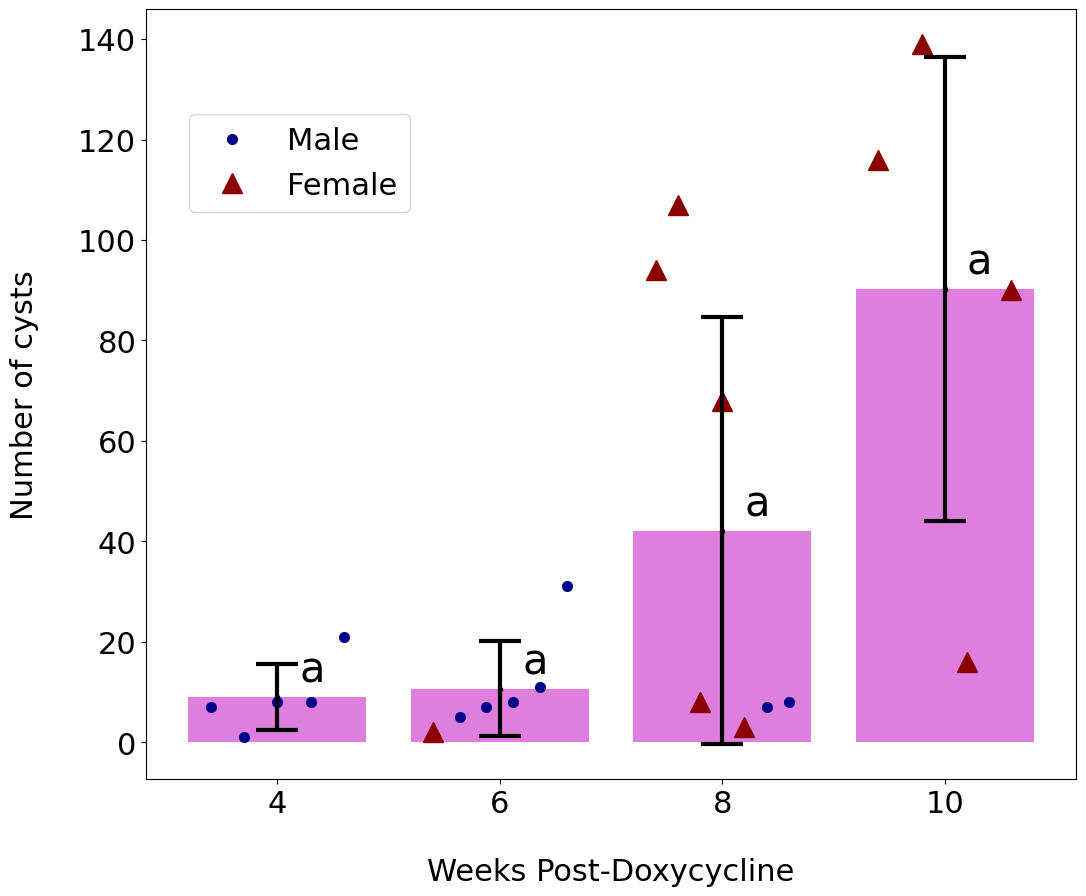

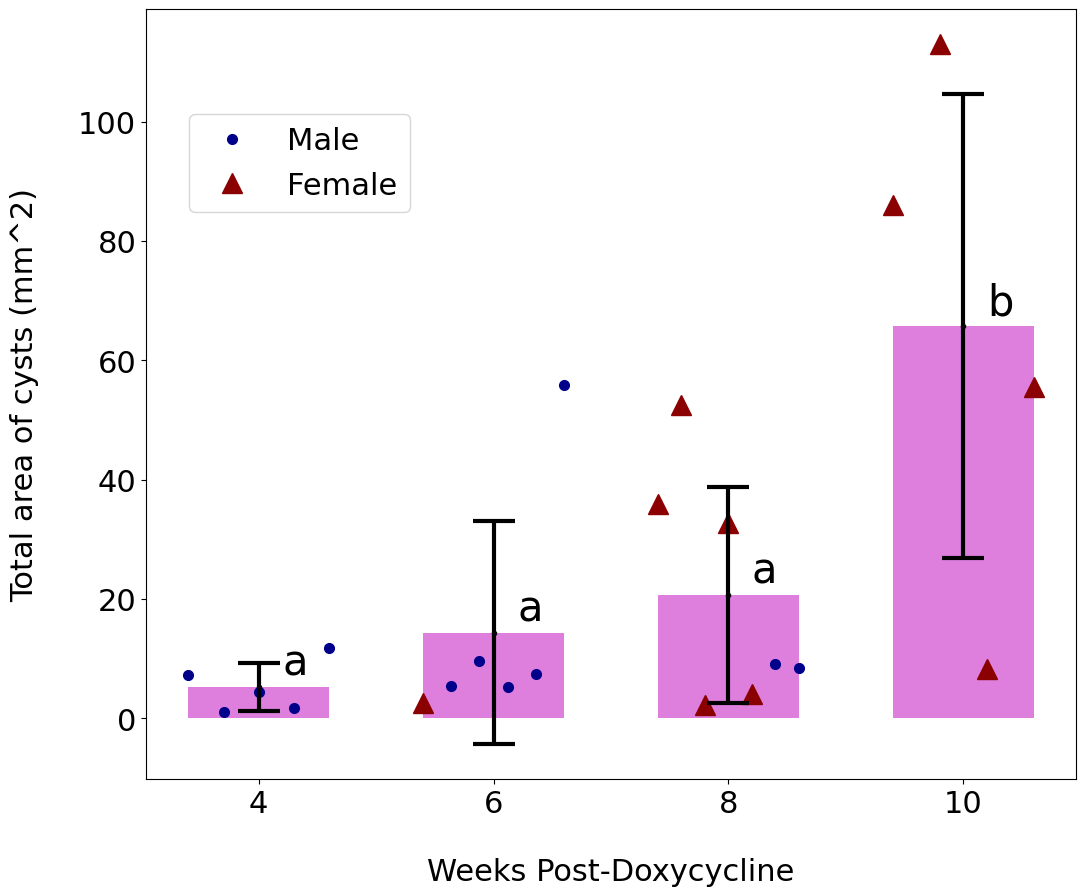

In [70]:
#Plotting all MRI results

#Pixel size if 0.01 mm^2 per pixel (aprox, from the DICOMS)

from scipy.stats import alexandergovern
from scipy.stats import ttest_ind

figuresFolder = 'E:/AAV para enfermedades renales/Publications/CT+MRI+Histology/Images/NewGraphs/MRI'
saving = True

pixSize = 0.01

plt.figure(figsize=(12,10))

upOffset1 = 3
rightOffset1 = 0.1

numCystsMeans = np.zeros(numCysts.shape[0])
numCystsStd = np.zeros(numCysts.shape[0])
for i in range(len(numCystsMeans)):
    numCystsMeans[i] = np.mean(numCysts[i,numCysts[i,:]!=0])
    numCystsStd[i] = np.std(numCysts[i,numCysts[i,:]!=0])
    #Plot points around i
    numPoints = np.sum(numCysts[i,:]!=0)
    pointPosit = i + np.linspace(-0.25,0.25,numPoints)
    #plt.plot(pointPosit,numCysts[i,numCysts[i,:]!=0],'.',ms = 14,color = 'darkred')

    #Plot the points separated by female (first batch) and male (second batch)
    
    count = -1
    for j in range(numCysts.shape[1]):
    
        #If it is one of the females
        
        if numCysts[i,j]!=0 and j<=4:
            count+=1
            if count == 0 and i == 1:
                labelName = 'Female'
            else:
                labelName = ''
            plt.plot(pointPosit[count],numCysts[i,j],'^',ms = 14,color = 'darkred',label = labelName)
        elif numCysts[i,j]!=0 and j>4:
            if j == 5 and i == 0:
                labelName = 'Male'
            else:
                labelName = ''
            count+=1
            plt.plot(pointPosit[count],numCysts[i,j],'.',ms = 14,color = 'darkblue',label=labelName) 

numCysts_dict = {'4 weeks':numCysts[0,numCysts[0,:]!=0],\
                    '6 weeks':numCysts[1,numCysts[1,:]!=0],\
                    '8 weeks':numCysts[2,numCysts[2,:]!=0],\
                    '10 weeks':numCysts[3,numCysts[3,:]!=0]}

plt.bar([0,1,2,3],numCystsMeans,color='m',width = 0.6,alpha=0.5)
plt.errorbar([0,1,2,3],numCystsMeans,numCystsStd,fmt='.',elinewidth=3,capthick=3,errorevery=1,capsize = 15,color='black')

#Perform ANOVA for the MRI cysts
groups =  [i[np.logical_not(np.isnan(i))] for i in numCysts_dict.values()]

#AGResMRInumCysts =alexandergovern(*groups)

print('\n\n')

#print('AGResMRInumCysts: ',AGResMRInumCysts)

AGResMRInumCysts0_1 = ttest_ind(*[groups[0],groups[1]],equal_var=True)
print('AGResMRInumCysts 4 weeks vs 6 weeks: ',AGResMRInumCysts0_1)

AGResMRInumCysts1_2 = ttest_ind(*[groups[1],groups[2]],equal_var=True)
print('AGResMRInumCysts 6 weeks vs 8 weeks: ',AGResMRInumCysts1_2)

AGResMRInumCysts2_3 = ttest_ind(*[groups[2],groups[3]],equal_var=True)
print('AGResMRInumCysts 8 weeks vs 10 weeks: ',AGResMRInumCysts2_3)



xAxisPoints = np.array([0,1,2,3])

plt.ylabel('Number of cysts\n')
plt.xlabel('\nWeeks Post-Doxycycline')
plt.xticks(ticks=xAxisPoints,labels=['4','6','8','10'])

plt.text(xAxisPoints[0]+rightOffset1, numCystsMeans[0]+upOffset1 , 'a', fontsize = 30)
plt.text(xAxisPoints[1]+rightOffset1, numCystsMeans[1]+upOffset1 , 'a', fontsize = 30)
plt.text(xAxisPoints[2]+rightOffset1, numCystsMeans[2]+upOffset1 , 'a', fontsize = 30)
plt.text(xAxisPoints[3]+rightOffset1, numCystsMeans[3]+upOffset1 , 'a', fontsize = 30)

plt.legend(labelcolor = 'black',loc='center right', bbox_to_anchor=(0.3,0.8))

if saving is True:
    plt.savefig(figuresFolder+'/MRI_Number_of_cysts_vs_Time_bars.png',bbox_inches='tight')
    

plt.figure(figsize=(12,10))

upOffset2 = 2
rightOffset2 = 0.1


totAreaCystsMeans = np.zeros(totAreaCysts.shape[0])
totAreaCystsStd = np.zeros(totAreaCysts.shape[0])
for i in range(len(totAreaCystsMeans)):
    totAreaCystsMeans[i] = np.mean(pixSize*totAreaCysts[i,totAreaCysts[i,:]!=0])
    totAreaCystsStd[i] = np.std(pixSize*totAreaCysts[i,totAreaCysts[i,:]!=0])
    #Plot points around i
    numPoints = np.sum(totAreaCysts[i,:]!=0)
    pointPosit = i + np.linspace(-0.25,0.25,numPoints)
    #plt.plot(pointPosit,pixSize*totAreaCysts[i,totAreaCysts[i,:]!=0],'.',ms = 14,color = 'darkred')

    #Plot the points separated by female (first batch) and male (second batch)
    
    count = -1
    for j in range(totAreaCysts.shape[1]):
        
        #If it is one of the females
        
        if pixSize*totAreaCysts[i,j]!=0 and j<=4:
            
            count+=1
            if count == 0 and i == 1:
                labelName = 'Female'
            else:
                labelName = ''
            plt.plot(pointPosit[count],pixSize*totAreaCysts[i,j],'^',ms = 14,color = 'darkred',label=labelName)
        elif pixSize*totAreaCysts[i,j]!=0 and j>4:
            if j == 5 and i == 0:
                labelName = 'Male'
            else:
                labelName = ''
            count+=1
            plt.plot(pointPosit[count],pixSize*totAreaCysts[i,j],'.',ms = 14,color = 'darkblue',label=labelName) 


totAreaCysts_dict = {'4 weeks':pixSize*totAreaCysts[0,totAreaCysts[0,:]!=0],\
                    '6 weeks':pixSize*totAreaCysts[1,totAreaCysts[1,:]!=0],\
                    '8 weeks':pixSize*totAreaCysts[2,totAreaCysts[2,:]!=0],\
                    '10 weeks':pixSize*totAreaCysts[3,totAreaCysts[3,:]!=0]}

plt.bar(xAxisPoints,totAreaCystsMeans,color='m',width = 0.6,alpha=0.5)
plt.errorbar(xAxisPoints,totAreaCystsMeans,totAreaCystsStd,fmt='.',elinewidth=3,capthick=3,errorevery=1,capsize = 15,color='black')

#Perform ANOVA for the MRI cysts total area
groups =  [i[np.logical_not(np.isnan(i))] for i in totAreaCysts_dict.values()]
groups0_1 = [groups[0],groups[1]]
#AGResMRItotAreaCysts = alexandergovern(*groups)

print('\n\n')

#print('AGResMRItotAreaCysts: ',AGResMRItotAreaCysts)

AGResMRItotAreaCysts0_1 = ttest_ind(*[groups[0],groups[1]],equal_var=True)
print('AGResMRInumCysts 4 weeks vs 6 weeks: ',AGResMRItotAreaCysts0_1)

AGResMRItotAreaCysts1_2 = ttest_ind(*[groups[1],groups[2]],equal_var=True)
print('AGResMRInumCysts 6 weeks vs 8 weeks: ',AGResMRItotAreaCysts1_2)

AGResMRItotAreaCysts2_3 = ttest_ind(*[groups[2],groups[3]],equal_var=True)
print('WelchResMRInumCysts 8 weeks vs 10 weeks: ',AGResMRItotAreaCysts2_3)



plt.ylabel('Total area of cysts (mm^2)\n')
plt.xlabel('\nWeeks Post-Doxycycline')
plt.xticks(ticks=[0,1,2,3],labels=['4','6','8','10'])



plt.text(xAxisPoints[0]+rightOffset2, totAreaCystsMeans[0]+upOffset2 , 'a', fontsize = 30)
plt.text(xAxisPoints[1]+rightOffset2, totAreaCystsMeans[1]+upOffset2 , 'a', fontsize = 30)
plt.text(xAxisPoints[2]+rightOffset2, totAreaCystsMeans[2]+upOffset2 , 'a', fontsize = 30)
plt.text(xAxisPoints[3]+rightOffset2, totAreaCystsMeans[3]+upOffset2 , 'b', fontsize = 30)
plt.legend(labelcolor = 'black',loc='center right', bbox_to_anchor=(0.3,0.8))

if saving is True:
    plt.savefig(figuresFolder+'/MRI_Area_of_cysts_vs_Time_bars.png',bbox_inches='tight')